# Apply and Visualize UMAP

**Gregory Way, 2019**

We are interested in visualizing the relationship among samples according to several variables.
These variables include `batch`, `dosage`, and `cell line`.

In [1]:
import os
import numpy as np
import pandas as pd
import umap

import plotnine as gg

In [2]:
%matplotlib inline

In [3]:
np.random.seed(123)

In [4]:
# Load data
file = os.path.join("data", "merged_intersected_variable_selected.csv")
data_df = pd.read_csv(file)

# Remove metadata columns
metadata_columns = data_df.columns.str.contains("Metadata_")

metadata_df = data_df.loc[:, metadata_columns]
umap_data_df = data_df.loc[:, ~metadata_columns]

print(umap_data_df.shape)
umap_data_df.head()

(72, 58)


,Cells_AreaShape_Orientation,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_3_1,Cells_AreaShape_Zernike_4_4,Cells_AreaShape_Zernike_6_2,Cells_AreaShape_Zernike_7_1,Cells_AreaShape_Zernike_7_3,Cells_AreaShape_Zernike_8_2,Cells_AreaShape_Zernike_8_4,Cells_AreaShape_Zernike_8_8,...,Nuclei_Granularity_8_DNA,Nuclei_Granularity_9_DNA,Nuclei_Location_MaxIntensity_Y_RNA,Nuclei_RadialDistribution_MeanFrac_Mito_1of4,Nuclei_RadialDistribution_RadialCV_AGP_1of4,Nuclei_RadialDistribution_RadialCV_AGP_2of4,Nuclei_RadialDistribution_RadialCV_ER_1of4,Nuclei_RadialDistribution_RadialCV_Mito_1of4,Nuclei_Texture_Correlation_RNA_10_01,Nuclei_Texture_Correlation_RNA_10_03
0,0.857277,-0.385890,-1.059274,2.156543,0.343755,-1.250890,1.348971,-0.463755,0.708378,1.992904,...,-0.470244,1.121606,0.376259,-1.759055,-0.680536,-0.644600,-0.563446,-0.363632,-1.433559,-1.081219
1,0.686491,0.502400,-0.927125,1.521494,-0.428196,-0.575414,0.417252,-0.651611,1.221392,1.636981,...,-0.248862,0.037218,-0.544336,-1.413942,-0.487956,-0.674732,-0.772732,-0.225900,-0.550553,-0.514341
2,0.064551,0.003380,-0.572242,1.318714,-0.141438,-0.861118,0.473162,-1.147238,0.640604,1.360415,...,0.022638,-0.381374,-0.140649,-1.343675,-0.093889,-0.284855,-0.629543,-0.087074,0.080014,0.533753
3,-1.768555,-0.051799,-0.814632,0.382121,0.321879,-0.872770,0.062140,-0.106835,0.628196,1.317379,...,-0.395670,-0.510152,-1.046112,-1.283621,0.601304,-0.188216,-0.701910,2.076125,0.567138,0.240592
4,0.629226,0.593074,-0.767333,0.380936,0.113808,-1.161265,0.643684,-0.697370,0.726720,0.168747,...,-0.357861,-0.664125,-1.100480,-0.894523,0.686828,-0.160861,-0.413383,1.313739,-0.324449,-0.162442


In [5]:
# Apply UMAP
reducer = umap.UMAP(random_state=123)
embedding = reducer.fit_transform(umap_data_df)

In [6]:
# Setup plotting logic
embedding_df = pd.DataFrame(embedding, columns=['x', 'y'])
embedding_df = embedding_df.merge(metadata_df, left_index=True, right_index=True)

embedding_df.head(3)

,x,y,Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_Batch_Number,Metadata_well_position,Metadata_CellLine,Metadata_Dosage
0,-5.840904,-1.731299,HCT116bortezomib,B03,HCT116bortezomib,PlateMap_HCT116bortezomib,1,B03,WT,0.0
1,-6.232426,-1.691851,HCT116bortezomib,B04,HCT116bortezomib,PlateMap_HCT116bortezomib,1,B04,WT,0.0
2,-6.423385,-1.937737,HCT116bortezomib,B05,HCT116bortezomib,PlateMap_HCT116bortezomib,1,B05,WT,0.0


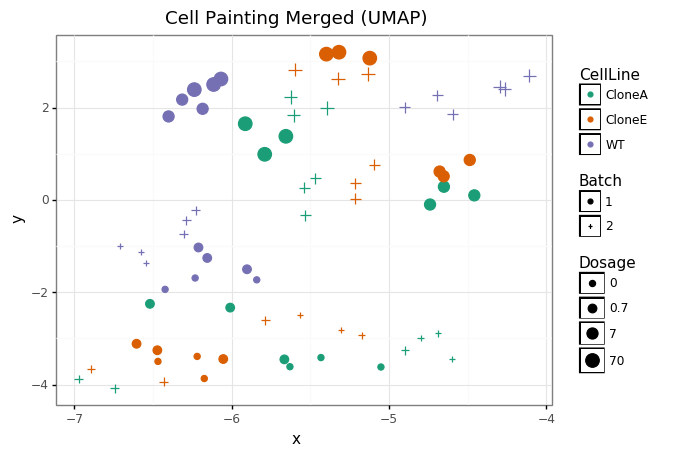

<ggplot: (-9223372036547014214)>

In [7]:
# Visualize UMAP results
p = gg.ggplot(embedding_df, gg.aes('x',
                                    'y',
                                    shape='factor(Metadata_Batch_Number)',
                                    color='Metadata_CellLine',
                                    size='factor(Metadata_Dosage)')) + \
    gg.geom_point() + \
    gg.theme_bw() + \
    gg.xlab("x") + \
    gg.ylab("y") + \
    gg.ggtitle("Cell Painting Merged (UMAP)") + \
    gg.scale_color_manual(name="CellLine", values=["#1b9e77", "#d95f02", "#7570b3"]) + \
    gg.scale_shape_manual(name="Batch", labels=[1, 2], values=['o', '+']) + \
    gg.scale_size_manual(name="Dosage", values=[2, 3, 4, 5]) + \
    gg.theme(legend_key=gg.element_rect(color="black", fill = "white"))

p

In [8]:
file = os.path.join("figures", "merged_umap")
for extension in ['.png', '.pdf', '.svg']:
    gg.ggsave(p, filename='{}{}'.format(file, extension), height=6, width=7)

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 7 x 6 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/merged_umap.png
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 7 x 6 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/merged_umap.pdf
  warn('Filename: {}'.format(filename))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 7 x 6 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.